# Linear Regression on Boston housing dataset

In this notebook I've implemented Linear Regression model on boston housing dataset
using tensorflow DNN but as linear unit

In [1]:
import tensorflow as tf                             # Import of tensorflow
from tensorflow.python.keras import Sequential      # Using Sequential model for embedding dense and input layer
from sklearn.preprocessing import StandardScaler    # Standard scaler for scaling data in standard dimensions
import pandas                                       # To give proper structure to dataset using frame
from matplotlib import pyplot as plt                # To visualize data and parameters of model

In below cell I've configured Tensorflow to use GPU for computations.<br>
<br>
If you do not have GPU on your system delete following cell


In [2]:
tf.config.PhysicalDevice('GPU:0',device_type='GPU') # Configuring Tensorflow to use GPU on device

PhysicalDevice(name='GPU:0', device_type='GPU')

Downloading Dataset using Tensorflow function<br> 

splitting data into four variables<br>
x_train : training features<br>
y_train : training labels<br>
x_test : testing features for predictions<br>
y_test : testing labels to test against predictions made by model

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2)

Plot of training features without scaling

(array([[402.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [377.,  27.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [177., 227.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  12., 100., 104.,  58.,  24.,   0.,   0., 106.],
        [404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 20.,  11.,   3.,   7.,  35., 328.,   0.,   0.,   0.,   0.],
        [404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  71.1, 142.2, 213.3, 284.4, 355.5, 426.6, 497.7, 568.8,
        639.9, 71

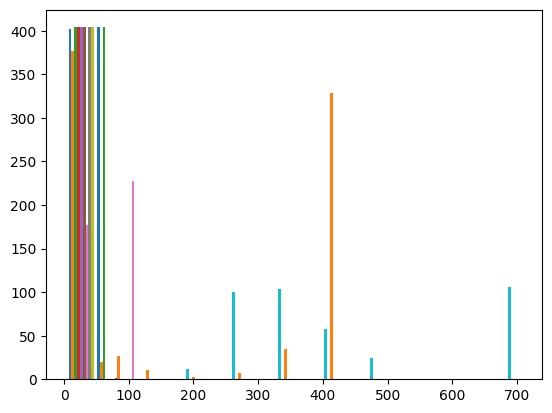

In [4]:
plt.hist(x_train)

Standard scaler to scale data properly</br>

plot of data after scaling

(404, 13)


(array([[  0.,   0., 315.,  68.,  13.,   2.,   3.,   0.,   2.,   1.],
        [  0.,   0., 306.,  56.,  18.,  24.,   0.,   0.,   0.,   0.],
        [  0.,  41., 194., 147.,  22.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., 379.,   0.,   0.,  25.,   0.,   0.,   0.,   0.],
        [  0.,  33., 204., 135.,  32.,   0.,   0.,   0.,   0.,   0.],
        [  5.,  25., 209., 132.,  26.,   7.,   0.,   0.,   0.,   0.],
        [  0.,  69., 110., 225.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   7., 241., 109.,  44.,   3.,   0.,   0.,   0.,   0.],
        [  0.,   0., 300.,   0., 104.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  12., 262.,  24., 106.,   0.,   0.,   0.,   0.,   0.],
        [  3.,  61., 122., 216.,   2.,   0.,   0.,   0.,   0.,   0.],
        [ 29.,   7.,  48., 320.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  28., 213., 120.,  37.,   6.,   0.,   0.,   0.,   0.]]),
 array([-3.81725032, -2.51204057, -1.20683082,  0.09837893,  1.40358868,
         2.7087

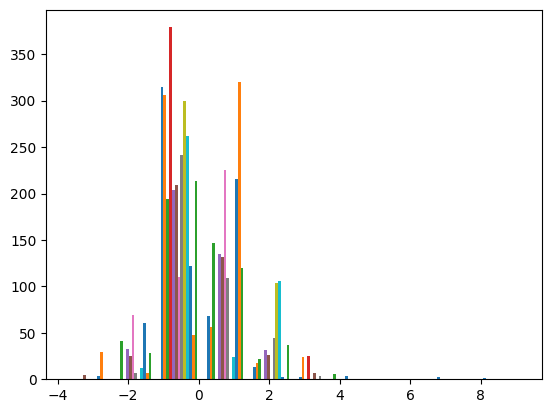

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pandas.DataFrame(data=scaler.transform(x_train))
print(x_train.shape)

plt.hist(x_train)

Plot of Y values which will be used to calculate Mean Squre Error for model

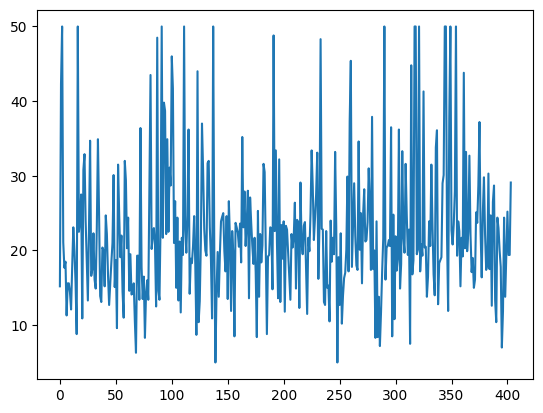

In [6]:
plt.plot(y_train,)

# Implementation of Model in Sequential</br>

Input Layer : To give input to model. Shape = 13 beacuse of features</br>
Dense Layer : With only one unit and activation fuction as linear</br>
having only one variable means having only one weight and bias for each feature</br>

In [7]:
model = Sequential()                                        # Sequenstial Init

activation = tf.keras.activations.linear                    # Activation Function for each unit in DNN
input_layer = tf.keras.layers.InputLayer(input_shape=(13))  # Initialization of input layer 
dense = tf.keras.layers.Dense(1,activation=activation)      # Dense layer with only one activation
model.add(input_layer)                                      # Addition of layers to model
model.add(dense)                                            # Addition of layers to model

Definition of loss function as MSE</br>

Compilation of model with optimizer Adam and loss : MSE

In [8]:
loss = tf.keras.losses.mean_squared_error
model.compile(optimizer='adam' ,loss=loss)

print(model.summary)                                        # Printing Out Summary of Model

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001D62C1EC808>>


Training of model over training data (with split of 20% for validation of model after each epoch/iteration)</br>

hist : History of model performance over each iteration (Actual loss and Validation loss)

In [9]:
hist = model.fit(x_train,y_train,epochs=200,batch_size=1,validation_split=0.2)

Epoch 1/200
323/323 [==============================] - 2s 2ms/step - loss: 573.4233 - val_loss: 645.9460
Epoch 2/200
323/323 [==============================] - 1s 2ms/step - loss: 554.9985 - val_loss: 625.7238
Epoch 3/200
323/323 [==============================] - 1s 2ms/step - loss: 537.6167 - val_loss: 606.2337
Epoch 4/200
323/323 [==============================] - 1s 2ms/step - loss: 521.0624 - val_loss: 587.8715
Epoch 5/200
323/323 [==============================] - 1s 2ms/step - loss: 505.2420 - val_loss: 570.2131
Epoch 6/200
323/323 [==============================] - 1s 2ms/step - loss: 490.1737 - val_loss: 553.3214
Epoch 7/200
323/323 [==============================] - 0s 2ms/step - loss: 475.7078 - val_loss: 537.1051
Epoch 8/200
323/323 [==============================] - 1s 2ms/step - loss: 461.7636 - val_loss: 521.3817
Epoch 9/200
323/323 [==============================] - 1s 2ms/step - loss: 448.3045 - val_loss: 506.3139
Epoch 10/200
323/323 [==============================] -

Graph plot of loss and val_loss to better understand model performance over training

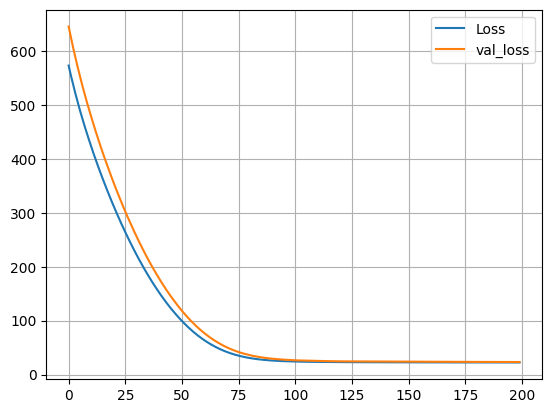

In [10]:

plt.plot(hist.history['loss'],label='Loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.grid(True)

Scaling of testing data for making prediction and test the performance of model

(102, 13)


(array([[ 0.,  0.,  0.,  0., 84., 10.,  6.,  2.,  0.,  0.],
        [ 0.,  0.,  0., 72.,  5., 14.,  5.,  1.,  5.,  0.],
        [ 0.,  0.,  9., 37., 15., 30.,  7.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 92.,  0.,  0.,  0.,  0., 10.],
        [ 0.,  0., 10., 34., 26., 17., 13.,  0.,  2.,  0.],
        [ 0.,  0.,  5., 19., 45., 21.,  6.,  3.,  2.,  1.],
        [ 0.,  5., 17., 11., 23., 37.,  9.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 42., 27., 13.,  8.,  7.,  3.,  2.],
        [ 0.,  0.,  0., 57., 17.,  0., 28.,  0.,  0.,  0.],
        [ 0.,  0.,  5., 47., 19.,  0., 31.,  0.,  0.,  0.],
        [ 0.,  3., 11., 14., 31., 38.,  5.,  0.,  0.,  0.],
        [ 5.,  0.,  3.,  2., 22., 70.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  4., 38., 32., 18.,  5.,  4.,  1.,  0.]]),
 array([-3.5122567 , -2.7474478 , -1.9826389 , -1.21783   , -0.4530211 ,
         0.3117878 ,  1.0765967 ,  1.8414056 ,  2.6062145 ,  3.3710234 ,
         4.13583229]),
 <a list of 13 BarContainer objects>)

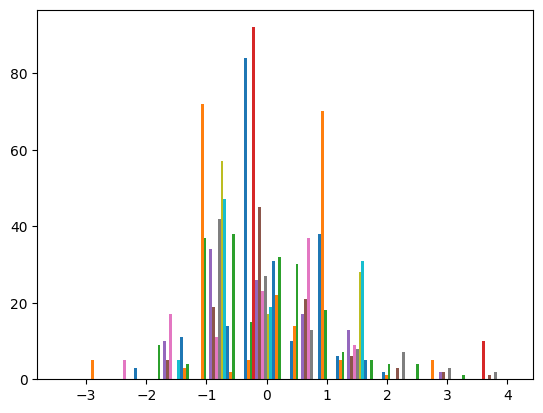

In [11]:
scal = StandardScaler()
scal.fit(x_test)

x_test = pandas.DataFrame(data=scaler.transform(x_test))
print(x_test.shape)

plt.hist(x_test)

Use of model for predictions</br>

pred : list of predictions predicted by model 

In [12]:
pred = model.predict(x_test)

Calculation of MSE loss over predictions and real values

In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,pred)
print("Mean Squared Error : ",mse)

Mean Squared Error :  22.146404646475922


Plot of actual values vs predicted values 

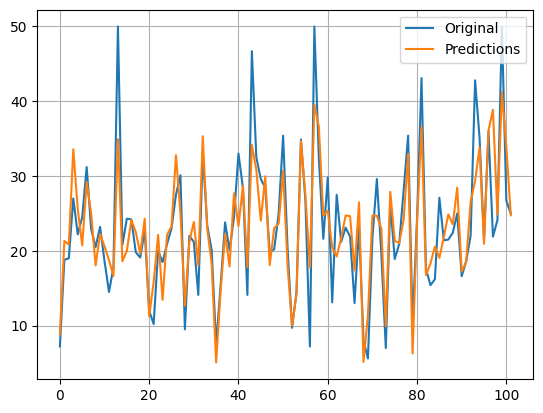

In [14]:
plt.plot(y_test,label="Original")
plt.plot(pred,label="Predictions")
plt.legend()
plt.grid(True)

As result model turned out to be quite good in the end

Happy Learnings...